In [1]:
%load_ext autoreload
%autoreload 2

# Evaluation of finite size effects in Kitaev honeycomb

Find herein a reproduction of the finite size scaling analysis carried out in Kitaev Appendix A as a sanity check for Koala.

## Imports

In [36]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from koala.example_graphs import generate_hex_square_oct,generate_honeycomb,generate_tri_non
from koala.graph_color import color_lattice
from koala.pointsets import generate_bluenoise
from koala.voronization import generate_lattice
from koala.graph_color import color_lattice
from koala.plotting import plot_lattice, peru_friendly_colour_scheme
from koala.hamiltonian import generate_majorana_hamiltonian
import koala.plotting as pl

matplotlib.rcParams.update({'font.size': 26})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

## Utillities

In [37]:
from koala.lattice import Lattice

def construct_Ajk(lattice: Lattice, edge_coloring: np.ndarray, ujk: np.ndarray, J_values: np.ndarray):
    """Wrapper around generate_majorana_hamiltonian to generate A matrix from couplings ujk

    :param lattice: system to construct the matrix on
    :type lattice: Lattice
    :param edge_colouring: colouring for the edges must be a set of ±1 values
    :type edge_colouring: np.ndarray
    :param ujk: bond signs
    :type ujk: np.ndarray
    :param J_values: j values
    :type J_values: np.ndarray
    :return: the A matrix
    :rtype: np.ndarray
    """
    ham = generate_majorana_hamiltonian(lattice, edge_coloring, ujk, J_values)
    ham /= (1.0j / 4.0) # Go from H -> A
    return ham
    
def find_ground_state_energy(lattice: Lattice, edge_colouring: np.ndarray, ujk: np.ndarray, J_values: np.ndarray):
    """For a given lattice and flux sector, obtain the sector energy by summing negative eigenvalues, see
    Kitaev eqn (25)
    
    :param lattice: system to construct the matrix on
    :type lattice: Lattice
    :param edge_colouring: colouring for the edges must be a set of ±1 values
    :type edge_colouring: np.ndarray
    :param ujk: bond signs
    :type ujk: np.ndarray
    :param J_values: j values
    :type J_values: np.ndarray
    :return: flux sector energy
    :rtype: float
    """
    ham = construct_Ajk(lattice,edge_colouring,ujk,J_values)
    energies = np.linalg.eigvalsh(1j*ham)
    energy = -np.sum(np.abs(energies))/4
    return energy

## Calculation

### Gapless

In [49]:
J_vals = np.array([1,1,1])

vals = []
for i in range(1,20):
    print(f"Solving honeycomb with {i} horizontal plaqs")
    honeycomb = generate_honeycomb(i,True)
    ujk = np.full(honeycomb[0].n_edges, 1)
    Ajk = construct_Ajk(honeycomb[0], honeycomb[1], ujk, J_vals)
    energy = find_ground_state_energy(honeycomb[0], honeycomb[1], ujk, J_vals)
    energy_per_plaquette = energy / honeycomb[0].n_plaquettes
    relative_energy = energy_per_plaquette + 1.5746
    vals.append(relative_energy)

Solving honeycomb with 1 horizontal plaqs
Solving honeycomb with 2 horizontal plaqs
Solving honeycomb with 3 horizontal plaqs
Solving honeycomb with 4 horizontal plaqs
Solving honeycomb with 5 horizontal plaqs
Solving honeycomb with 6 horizontal plaqs
Solving honeycomb with 7 horizontal plaqs


/tmp/ipykernel_115290/2633884816.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  energy_per_plaquette = energy / honeycomb[0].n_plaquettes


Solving honeycomb with 8 horizontal plaqs
Solving honeycomb with 9 horizontal plaqs
Solving honeycomb with 10 horizontal plaqs
Solving honeycomb with 11 horizontal plaqs
Solving honeycomb with 12 horizontal plaqs
Solving honeycomb with 13 horizontal plaqs
Solving honeycomb with 14 horizontal plaqs
Solving honeycomb with 15 horizontal plaqs
Solving honeycomb with 16 horizontal plaqs
Solving honeycomb with 17 horizontal plaqs
Solving honeycomb with 18 horizontal plaqs
Solving honeycomb with 19 horizontal plaqs


Text(0.5, 0, 'System extent L')

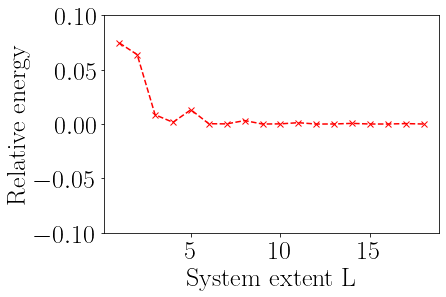

In [50]:
plt.plot(vals, 'rx--')
plt.ylim([-0.1,0.1])
plt.ylabel("Relative energy")
plt.xlabel("System extent L")

### Gapped

In [45]:
J_vals = np.array([1,0.1,0.1])

vals = []
for i in range(1,15):
    print(f"Solving honeycomb with {i} horizontal plaqs")
    honeycomb = generate_honeycomb(i,True)
    ujk = np.full(honeycomb[0].n_edges, 1)
    Ajk = construct_Ajk(honeycomb[0], honeycomb[1], ujk, J_vals)
    energy = find_ground_state_energy(honeycomb[0], honeycomb[1], ujk, J_vals)
    energy_per_plaquette = energy / honeycomb[0].n_plaquettes
    vals.append(energy_per_plaquette)

Solving honeycomb with 1 horizontal plaqs
Solving honeycomb with 2 horizontal plaqs
Solving honeycomb with 3 horizontal plaqs
Solving honeycomb with 4 horizontal plaqs
Solving honeycomb with 5 horizontal plaqs
Solving honeycomb with 6 horizontal plaqs


/tmp/ipykernel_115290/1415352629.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  energy_per_plaquette = energy / honeycomb[0].n_plaquettes


Solving honeycomb with 7 horizontal plaqs
Solving honeycomb with 8 horizontal plaqs
Solving honeycomb with 9 horizontal plaqs
Solving honeycomb with 10 horizontal plaqs
Solving honeycomb with 11 horizontal plaqs
Solving honeycomb with 12 horizontal plaqs
Solving honeycomb with 13 horizontal plaqs
Solving honeycomb with 14 horizontal plaqs


Text(0.5, 0, 'System extent L')

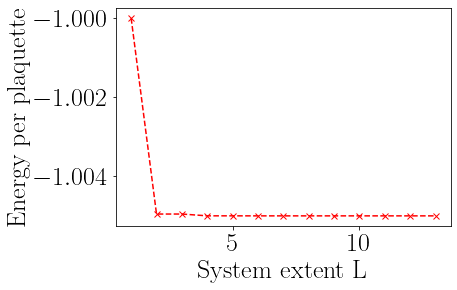

In [48]:
plt.plot(vals, 'rx--')
plt.ylabel("Energy per plaquette")
plt.xlabel("System extent L")